In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn import *
from keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD,Adam

In [3]:
data = pd.read_excel('./Raisin_Dataset/Raisin_Dataset.xlsx',)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

Text(0.5, 1.0, 'Label')

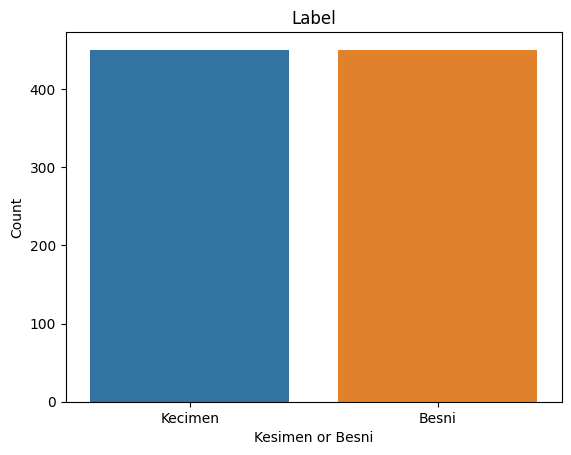

In [6]:
sns.countplot(data = data, x="Class")
plt.xlabel("Kesimen or Besni")
plt.ylabel("Count")
plt.title("Label")

In [7]:
missing_values = data.isnull().sum()
missing_values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

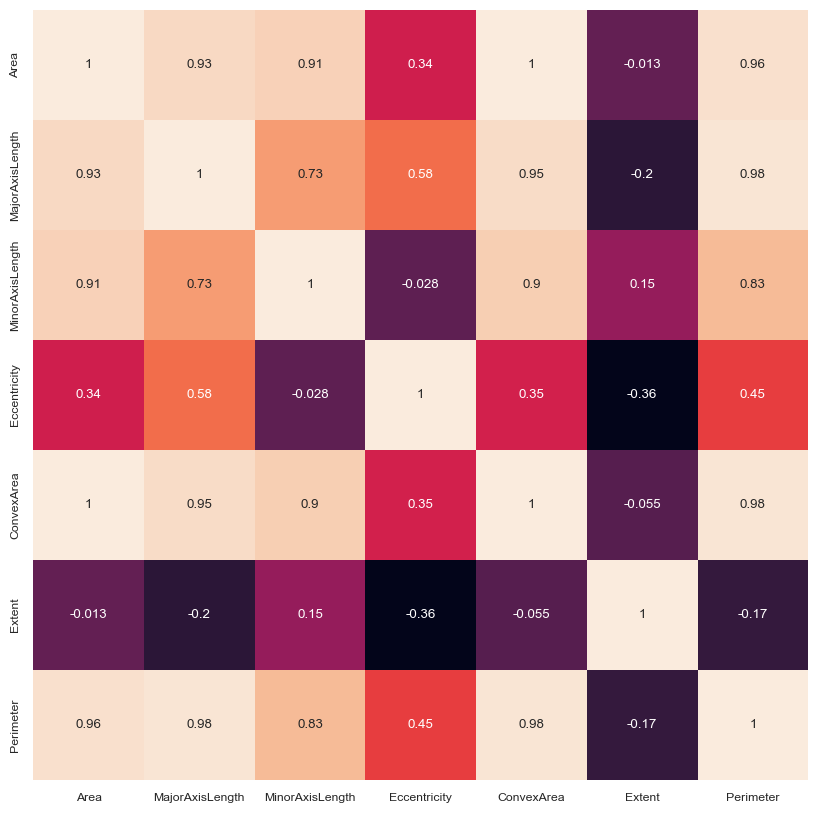

In [8]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
# 입력 특성과 타겟 분리
X = data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']]
y = data['Class']

In [10]:
# 데이터 전처리
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [12]:
# 데이터 정규화 (스케일 조정)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 데이터 형태 변경 (CNN에 맞게)
X_train_reshaped = X_train_scaled.reshape(-1, 7, 1, 1)  # 적절한 형태로 변경
X_test_reshaped = X_test_scaled.reshape(-1, 7, 1, 1)

In [16]:
# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(7, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 5, 1, 32)          128       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
____________________________________________________

In [18]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
# 모델 훈련
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
18/18 [==============================] - 1s 14ms/step - loss: 0.6025 - accuracy: 0.6615 - val_loss: 0.4578 - val_accuracy: 0.8750
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8299 - val_loss: 0.3425 - val_accuracy: 0.8958
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8472 - val_loss: 0.3069 - val_accuracy: 0.8958
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8594 - val_loss: 0.2971 - val_accuracy: 0.8958
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.8594 - val_loss: 0.2957 - val_accuracy: 0.9097
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8594 - val_loss: 0.2930 - val_accuracy: 0.9097
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8646 - val_loss: 0.2926 - val_accuracy: 0.9236
Epoch 8/10
18/18 [=

In [20]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8667
Test Loss: 0.33576124906539917, Test Accuracy: 0.8666666746139526
